# Measures of Position

## Objectives ##
- Calculate percentiles and quartiles and interpret the results.
- Construct and interpret box plots.

## Percentiles ##
A common measure of position is **percentiles**. Percentiles are values that divide ordered data into 100 equally sized groups. To score in the 90th percentile of an exam does not mean, necessarily, that you received 90% on a test. It means that 90% of test scores are the same or less than your score and 10% of the test scores are the same or greater than your test score.

Percentiles are useful for comparing values. For this reason, universities and colleges use percentiles extensively. One instance in which colleges and universities use percentiles is when SAT results are used to determine a minimum testing score that will be used as an acceptance factor. For example, suppose Duke accepts SAT scores at or above the 75th percentile. This means Duke will only accept students with an SAT scores higher than at least 75% of all SAT scores.

Percentiles are mostly used with very large populations. Therefore, if you were to say that 90% of the test scores are less (and not the same or less) than your score, it would be acceptable because removing one particular data value is not significant in a very large population.

To calculate percentiles by hand, the data must be ordered from smallest to largest. But we can use R to quickly find percentiles without ordering the data using the <code>quantile</code> function. **Quantiles** are values that divide ordered data into any number of equally-sized groups, so a percentile is a type of **quantile**. 

The syntax for the <code>quantile</code> function is:

```R
quantile(x, probs)
```
In this case, <code>x</code> is the list of data that we want the percentiles of and <code>probs</code> is the percentage or list of percentages, converted to decimal form, corresponding to our percentiles. The name <code>probs</code> is an abbreviation for 'probabilities.' We will learn more about why that abbreviation is appropriate later.

The following example illustrates how to use the <code>quantile</code> function to find a percentile.

***


### Example 2.1.1 ###

Listed are 29 ages for Academy Award winning best actors. Find the 73rd percentile. Explain, in words, what this value represents.

<center>
18, 21, 22, 25, 26, 27, 29, 30, 31, 33, 36, 37, 41, 42, 47, 52, 55, 57, 58, 59, 62, 65, 67, 71, 72, 73, 74, 76, 77
</center>

#### Solution ####
We will use the <code>quantile</code> function in R with <code>probs = 0.73</code>, since 73% = 0.73. Note that it is important to use the decimal form of the percentage; if we use <code>probs = 73</code>, we will get an error.

In [22]:
ages = c(18, 21, 22, 25, 26, 27, 29, 30, 31, 33, 36, 37, 41, 42, 47, 52, 55, 57, 58, 59, 62, 65, 67, 71, 72, 73, 74, 76, 77)

quantile(ages, probs = 0.73)

73% 
63.32

So the 73rd percentile is 63.32. That means that of the 29 Academy Award winning best actors in our sample, 73% of them were younger than 63.32 years old.


***

## Quartiles

**Quartiles** are values that divide ordered data into 4 equally sized groups, called **quarters**. A quartile is another kind of quantile.

- The first quartile, $Q_1$, is the same as the 25th percentile. 
- The second quartile, $Q_2$, is the same as the 50th percentile. 
- The third quartile, $Q_3$, is the same as the 75th percentile.

The four quarters that we get from the quartiles each contain about the same amount of data values.

- The first quarter consists of the data values less than or equal to $Q_1$ (the 25th percentile). This quarter contains 25% of the data values.
- The second quarter consists of the data values between $Q_1$ (the 25th percentile) and $Q_2$ (the 50th percentile). This quarter contains 25% of the data values.
- The third quarter consists of the data values between $Q_2$ (the 50th percentile) and $Q_3$ (the 75th percentile). This quarter contains 25% of the data values.
- The fourth quarter consists of the data values greater than or equal to$Q_3$ (the 75th percentile). This quarter contains 25% of the data values.

In [6]:
library(beeswarm)

png("quartiles_and_quarters.png", width = 1000, height = 700)

rangebrace = function(x, y0, y1, d, col){
    X = seq(x, x+d, length = 500)
    Ytop = (y1 - y0)/4 * ( -(2/d)^(1/3) * sign(X - (x + d/2))*abs(X - (x + d/2))^(1/3) + 1 ) + (y0 + y1)/2
    Ybot = (y1 - y0)/4 * ( (2/d)^(1/3) * sign(X - (x + d/2))*abs(X - (x + d/2))^(1/3) - 1 ) + (y0 + y1)/2
    lines(X, Ytop, lwd = 3, col = col)
    lines(X, Ybot, lwd = 3, col = col)
}
    

#x = runif(100, max = 10)
#x = rnorm(100)
#x = rpois(100, 20)
x = rchisq(100, 10)

m = min(x)
q1 = quantile(x, probs = 0.25)
q2 = quantile(x, probs = 0.50)
q3 = quantile(x, probs = 0.75)
M = max(x)

color = "blue3"
delta = 0.2
left = 1 - delta
right = 1 + delta

par(mar = c(1, 3, 2, 1))

beeswarm(x, pch = 21, col = "black", bg = "gray70", cex = 2.5, xlim = c(left - 0.05, 1.45), cex.axis = 2, cex.main = 2, main = "Quartiles and Quarters for 100 Data Values", yaxt = "n")
#stripchart(x, method = "jitter", vertical = TRUE, pch = 21, col = "black", bg = "gray70", lwd = 3, cex = 2.5, xlim = c(left - 0.05, 1.45), cex.axis = 2, cex.main = 2, main = "Quartiles and Quarters for 100 Data Values", yaxt = "n")
axis(2, at = seq(0, 30, 2), cex.axis = 2, las = 2)

segments(left, m, right, m, lwd = 3, lty = "dotted", col = color)
segments(left, q1, right, q1, lwd = 3, lty = "dotted", col = color)
segments(left, q2, right, q2, lwd = 3, lty = "dotted", col = color)
segments(left, q3, right, q3, lwd = 3, lty = "dotted", col = color)
segments(left, M, right, M, lwd = 3, lty = "dotted", col = color)

text(x = left, y = m, labels = "Min", cex = 2, pos = 2, col = color)
text(x = left, y = q1, labels = "Q₁", cex = 2, pos = 2, col = color)
text(x = left, y = q2, labels = "Q₂", cex = 2, pos = 2, col = color)
text(x = left, y = q3, labels = "Q₃", cex = 2, pos = 2, col = color)
text(x = left, y = M, labels = "Max", cex = 2, pos = 2, col = color)

d = 0.015
rangebrace(right, m, q1, d, color)
rangebrace(right, q1, q2, d, color)
rangebrace(right, q2, q3, d, color)
rangebrace(right, q3, M, d, color)

text(x = right+d, y = (m + q1)/2, labels = "1st Quarter\nContains 25% of Data Values", cex = 2, pos = 4, col = color)
text(x = right+d, y = (q1 + q2)/2, labels = "2nd Quarter\nContains 25% of Data Values", cex = 2, pos = 4, col = color)
text(x = right+d, y = (q2 + q3)/2, labels = "3rd Quarter\nContains 25% of Data Values", cex = 2, pos = 4, col = color)
text(x = right+d, y = (q3 + M)/2, labels = "4th Quarter\nContains 25% of Data Values", cex = 2, pos = 4, col = color)

dev.off()


png 
  2

```{figure} quartiles_and_quarters.png
---
width: 100%
alt: An illustration of quartiles and quarters for 100 random values.
name: quartiles-and-quarters
---
Quartiles and quarters for 100 random data values. The quartiles ($Q_1$, $Q_2$, and $Q_3$) divide the data into quarters. Note that each quarter of the data contains 25% of data values. The data is more spread out in larger quarters and more squished together in smaller quarters, but both large quarters and small quarters contain the same number of data values.
```

The second quartile, $Q_2$, is more often called the **median** and represented by the variable $M$. It is a number that measures the "center" of the data. You can think of the median as the "middle value," but it does not actually have to be one of the observed values. It is a number that separates ordered data into halves. Half the values are the same value or smaller than the median, and half the values are the same value or larger than the median. For example, consider the following data.

<center>
1, 11.5, 6, 7.2, 4, 8, 9, 10, 6.8, 8.3, 2, 2, 10, 1 
</center>

Ordered from smallest to largest: 

<center>
1, 1, 2, 2, 4, 6, 6.8, 7.2, 8, 8.3, 9, 10, 10, 11.5
</center>

Since there are 14 observations, the median is between the seventh value, 6.8, and the eighth value, 7.2. To find the median, average the two values together by adding them and dividing by 2.

$$\frac{6.8 + 7.2}{2} = 7$$

The median is 7. Half of the values are smaller than 7 and half of the values are larger than 7.

Let's confirm the median is 7 using R. Since the median is the 50th percentile, we will use <code>probs = 0.50</code>, since 50% = 0.50.

In [1]:
data = c(1, 11.5, 6, 7.2, 4, 8, 9, 10, 6.8, 8.3, 2, 2, 10, 1)

quantile(data, probs = 0.50)

50% 
  7

From our R calculation, we see that the median, or the 50th percentile, is 7. This matches the result we obtained from our calculation by hand above. But recall that when we calculated the median by hand, we had to first order the data from smallest to largest. By contrast, we were able to leave the data we plugged into R unordered and let the computer do the hard work.

We can use the <code>quantile</code> function allows us to quickly and easily find any quartile, not just the median.

```{note}
Be careful not to confuse the term *qua**r**tile* with the term *qua**n**tile*. **Quart**iles split the data into four **quart**ers, while **quant**iles split the data using more general **quant**ities.
```

***


### Example 2.1.2 ###
For the following 13 real estate prices, calculate the quartiles.

<center>
$389,950; $230,500; $158,000; $479,000; $639,000; $114,950; $5,500,000; $387,000; $659,000; $529,000; $575,000; $488,800; $1,095,000
</center>

#### Solution ####
We will use the <code>quantile</code> function to calculate our quartiles. 
- To calculate our first quartile $Q_1$, we will use <code>probs = 0.25</code>. 
- To calculate our median $M$ or second quartile $Q_2$, we will use <code>probs = 0.50</code>.
- To calculate our third quartile $Q_3$, we will use <code>probs = 0.75</code>.

But notice that our list of real estate prices above isn't ready to be input into R: it won't understand the dollar sign, and we must use a comma to separate values.

<center>
389950, 230500, 158000, 479000, 639000, 114950, 5500000, 387000, 659000, 529000, 575000, 488800, 1095000
</center>

```{warning}
R will not allow the use of a comma to mark the thousands place of a number; commas are only used in R to separate values or items in a list. For example, if you type <code>389,950</code> into R, it will interpret it as a list of two numbers: 389 and 950. Instead, we omit the comma and type simply <code>389950</code>.
```

In [1]:
prices = c(389950, 230500, 158000, 479000, 639000, 114950, 5500000, 387000, 659000, 529000, 575000, 488800, 1095000)

#First Quartile
quantile(prices, probs = 0.25)

#Median/Second Quartile
quantile(prices, probs = 0.50)

#Third Quartile
quantile(prices, probs = 0.75)

25% 
387000

50% 
488800

75% 
639000

So $Q_1 = \$387,000$, $Q_2 = \$488,800$, and $Q_3 = \$639,000$.

So we deduce that:
- About 25% of the real estate prices in our sample are less than $Q_1 = \$387,000$ (in the first quarter of the data).
- About 25% of the real estate prices in our sample are between $Q_1 = \$387,000$ and $Q_2 = \$488,800$ (in the second quarter of the data).
- About 25% of the real estate prices in our sample are between $Q_2 = \$488,800$ and $Q_3 = \$639,000$ (in the third quarter of the data).
- About 25% of the real estate prices in our sample are greater than $Q_3 = \$639,000$ (in the fourth quarter of the data).

The quartiles quartered the data into groups each containing 25% of the data points.

***

## Box Plots ##
**Box plots** (also called **box-and-whisker plots** or **box-whisker plots**) give a good graphical image of the concentration of the data. They also show how far the extreme values are from most of the data. A box plot is constructed from five values: the minimum value, the first quartile, the second quartile or median, the third quartile, and the maximum value. The box plot illustrates the four quarters of the data and how squished together or spread out the data in each quarter is.

To construct a box plot, use a horizontal or vertical number line and a rectangular box. The smallest and largest data values label the endpoints of the axis. The first quartile marks one end of the box and the third quartile marks the other end of the box. **Approximately the middle 50 percent of the data fall inside the box.** The "whiskers" extend from the ends of the box to the smallest and largest data values. The box plot gives a good, quick picture of how the data is spread out.

To illustrate a box plot, consider this small dataset.

<center>
    1, 2, 2, 3, 5, 7, 9, 9, 11, 12, 15
</center>

We can easily find the quartiles for this data using R:

In [3]:
data = c(1, 2, 2, 3, 5, 7, 9, 9, 11, 12, 15)

quantile(data, probs = 0.25)
quantile(data, probs = 0.50)
quantile(data, probs = 0.75)

25% 
2.5

50% 
  7

75% 
 10

So $Q_1 = 2.5$, $Q_2 = 7$, and $Q_3 = 10$. We also note that 1 is the minimum value and 15 is the maximum value of the data. Observe that these quartiles and maximum/minimum values are plotted using horizontal lines in the box plot for the data in {numref}`Figure {number} <labeled-boxplot>`.

In [9]:
data = c(1, 2, 2, 3, 5, 7, 9, 9, 11, 12, 15)

png("labeled_boxplot.png", width = 1000, height = 700)

rangebrace = function(x, y0, y1, d, col){
    X = seq(x, x+d, length = 500)
    Ytop = (y1 - y0)/4 * ( -(2/d)^(1/3) * sign(X - (x + d/2))*abs(X - (x + d/2))^(1/3) + 1 ) + (y0 + y1)/2
    Ybot = (y1 - y0)/4 * ( (2/d)^(1/3) * sign(X - (x + d/2))*abs(X - (x + d/2))^(1/3) - 1 ) + (y0 + y1)/2
    lines(X, Ytop, lwd = 3, col = col)
    lines(X, Ybot, lwd = 3, col = col)
}

color = "blue3"

m = min(data)
q1 = quantile(data, probs = 0.25)
q2 = quantile(data, probs = 0.50)
q3 = quantile(data, probs = 0.75)
M = max(data)

par(mar = c(1, 3, 2, 1))
boxplot(data, col = "gray70", yaxt = "n", main = "Labeled Box Plot", cex.main = 2.5, xlim = c(0.5, 2), lwd = 3)

axis(2, at = 1:15, cex.axis = 2, las = 2)

text(x = 0.9, y = m, labels = "Min", cex = 2, pos = 2, col = color)
text(x = 0.8, y = q1, labels = "Q₁", cex = 2, pos = 2, col = color)
text(x = 0.8, y = q2, labels = "Q₂", cex = 2, pos = 2, col = color)
text(x = 0.8, y = q3, labels = "Q₃", cex = 2, pos = 2, col = color)
text(x = 0.9, y = M, labels = "Max", cex = 2, pos = 2, col = color)

d = 0.03
right = 1.21
rangebrace(right, m, q1, d, color)
rangebrace(right, q1, q2, d, color)
rangebrace(right, q2, q3, d, color)
rangebrace(right, q3, M, d, color)

text(x = right+d, y = (m + q1)/2, labels = "1st Quarter\nContains 25% of Data Values", cex = 2, pos = 4, col = color)
text(x = right+d, y = (q1 + q2)/2, labels = "2nd Quarter\nContains 25% of Data Values", cex = 2, pos = 4, col = color)
text(x = right+d, y = (q2 + q3)/2, labels = "3rd Quarter\nContains 25% of Data Values", cex = 2, pos = 4, col = color)
text(x = right+d, y = (q3 + M)/2, labels = "4th Quarter\nContains 25% of Data Values", cex = 2, pos = 4, col = color)


dev.off()

png 
  2

```{figure} labeled_boxplot.png
---
width: 100%
alt: A boxplot labeled with the minimum and maximum values, the quartile values, and the quarters.
name: labeled-boxplot
---
The locations of the quartiles ($Q_1$, $Q_2$, and $Q_3$) and the minimum and maximum values of the data are indicated with horizontal lines. While the data itself is not plotted, we can see how spread out the data is in each quarter. Note that each quarter of the data contains 25% of data values. The data is more spread out in larger quarters and more squished together in smaller quarters, but both large quarters and small quarters contain the same number of data values.
```

Note that box plots are different than other graphs like bar graphs. In a bar graph, the height of a bar tells us how many data values are in a particular category. The higher the bar is, the more data values are in that category. But each quarter of a box plot contains the same number of data values. The size of a quarter tells us how spread out the data values in that quarter are. The larger the quarter is, the more spread out the data values are in that quarter.

````{note}
You may encounter box plots that have dots marking especially extreme values. In these cases, the extreme values are left out of the box plot so that the data doesn't look more spread out than it really is.

```{figure} outlier_boxplot.png
---
width: 50%
alt: A box plot with one extreme value excluded from the main box plot and instead plotted as a separate point.
name: outlier-boxplot
---
A box plot with one extreme value excluded from the main box plot and instead plotted as a separate point.
```

````

In [148]:
png("outlier_boxplot.png", width = 500, height = 700)

data = rnorm(100)
par(mar = c(1, 1, 2, 1))
boxplot(data, col = "gray70", lwd = 3, cex = 3, yaxt = "n", main = "Box Plot with Extreme Value", cex.main = 2.5, xlim = c(0.75, 1.25))

dev.off()

png 
  2

We can construct a boxplot in R using the boxplot function:

```R
boxplot(x)
```
Here, <code>x</code> is the list of data we want to create a boxplot for.

```{note}
Sometimes there will be a slight difference between the quartile values we obtain using the <code>quantile</code> function and the partition boundaries on the box plot we obtain using the <code>boxplot</code> function. This is due to small differences in the way the <code>quantile</code> function and the <code>boxplot</code> function calculate $Q_1$ and $Q_3$. In practice, this small difference usually doesn't matter as both still partition the data into regions containing *about* 25% of the data.
```

***


### Example 2.1.3 ###
The following data are the heights of $40$ students in a statistics class. Construct a box plot using R. In which quarter is the data spread out the least? In which quarter is the data spread out the most?
<center>
60, 60, 61, 62, 62, 63, 63, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 67, 67, 68, 68, 69, 70, 70, 70, 70, 70, 71, 71, 72, 72, 73, 74, 74, 75, 77
    </center>
    
#### Solution ####
Simply construct a box plot of the data.

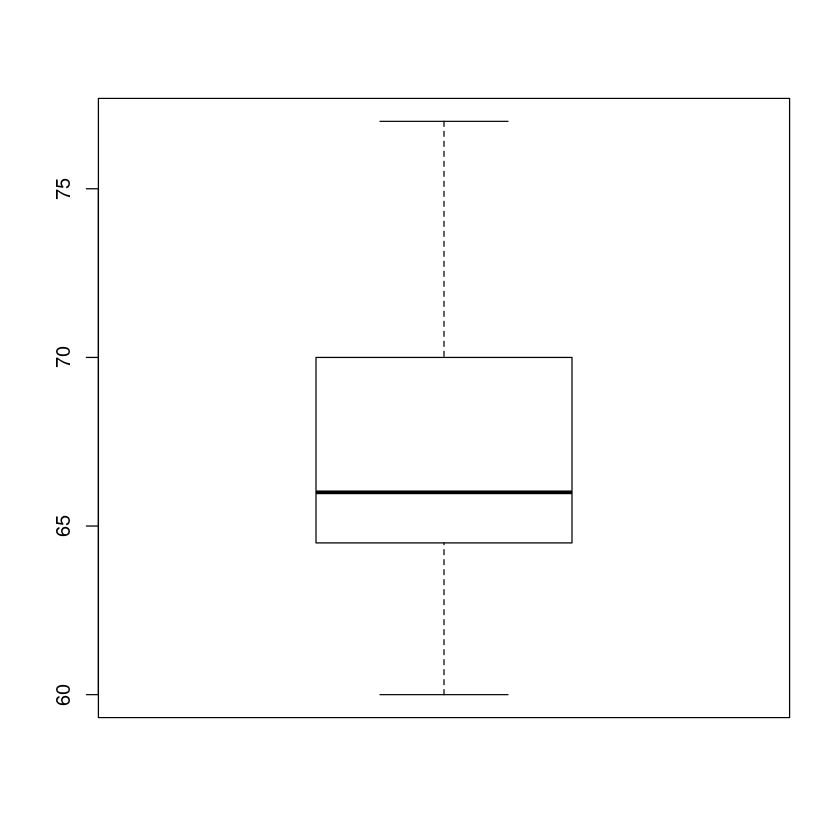

In [17]:
heights = c(60, 60, 61, 62, 62, 63, 63, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 67, 67, 68, 68, 69, 70, 70, 70, 70, 70, 71, 71, 72, 72, 73, 74, 74, 75, 77)

boxplot(heights)

In [18]:
png("boxplot_example.png", width = 700, height = 700)

heights = c(60, 60, 61, 62, 62, 63, 63, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 67, 67, 68, 68, 69, 70, 70, 70, 70, 70, 71, 71, 72, 72, 73, 74, 74, 75, 77)

par(mar = c(1, 3, 1, 1))
boxplot(heights, col = "gray70", lwd = 3, cex.axis = 2)

dev.off()

png 
  2

```{figure} boxplot_example.png
---
width: 70%
alt: A box plot of the example data.
name: boxplot-example
---
A box plot of the example data.
```

From the box plot, we can see that the region between the first quartile $Q_1$ and the median $M = Q_2$ has the smallest spread of data, and the region between the third quartile $Q_3$ and the maximum value has the largest spread of data.


***

By providing the <code>boxplot</code> function with multiple sets of data, we can generate multiple box plots side-by-side. This is useful for comparing how different data sets are distributed.

***

### Example 2.1.4
Use R to construct side-by-side boxplots for the two sets of data below. Which data set has the larger spread of data?

Data set 1:
64, 73, 101.3, 71.1, 94, 85.5, 99.9, 42, 92.4, 103, 54.7, 72.5, 101.9, 86.4, 47.2, 71.5, 71

Data set 2:
56.8, 71, 49, 69.4, 67.6, 71, 68.5, 61.1, 50.9, 71, 71, 71, 72, 72, 71, 64, 67.2, 52.5, 71, 69, 72, 71.3, 58.3, 71, 71


#### Solution
We will create two box plots side-by-side, one for each set of data.

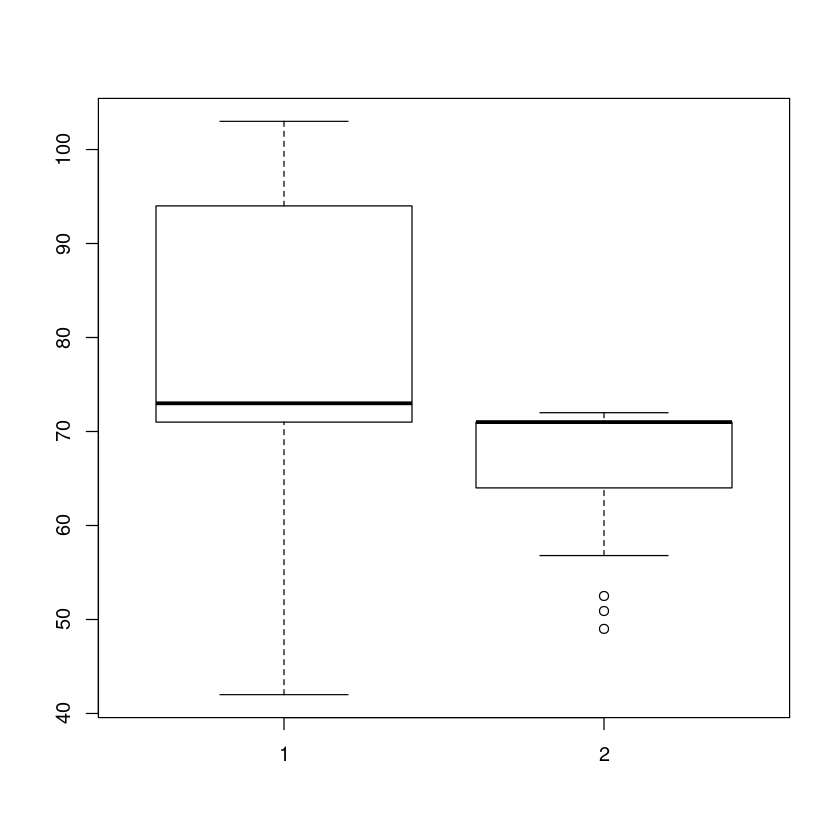

In [21]:
data1 = c(64, 73, 101.3, 71.1, 94, 85.5, 99.9, 42, 92.4, 103, 54.7, 72.5, 101.9, 86.4, 47.2, 71.5, 71)
data2 = c(56.8, 71, 49, 69.4, 67.6, 71, 68.5, 61.1, 50.9, 71, 71, 71, 72, 72, 71, 64, 67.2, 52.5, 71, 69, 72, 71.3, 58.3, 71, 71)

boxplot(data1, data2)

In [27]:
png("side_by_side_boxplots.png", width = 1000, height = 1000)

data1 = c(64, 73, 101.3, 71.1, 94, 85.5, 99.9, 42, 92.4, 103, 54.7, 72.5, 101.9, 86.4, 47.2, 71.5, 71)
data2 = c(56.8, 71, 49, 69.4, 67.6, 71, 68.5, 61.1, 50.9, 71, 71, 71, 72, 72, 71, 64, 67.2, 52.5, 71, 69, 72, 71.3, 58.3, 71, 71)

par(mar = c(1, 3, 1, 1))
boxplot(data1, data2, col = "gray70", cex = 3, lwd = 3, cex.axis = 2)

dev.off()

png 
  2

```{figure} side_by_side_boxplots.png
---
width: 100%
alt: Two box plots side-by-side.
name: side-by-side-boxplots
---
Two box plots side-by-side makes it easy to compare how different data sets are distributed.
```

By examining the box plots, we quickly see that the data in data set 1 is much more spread out than the data in data set 2.